#カーネルとSVM (Support Vector Machine)

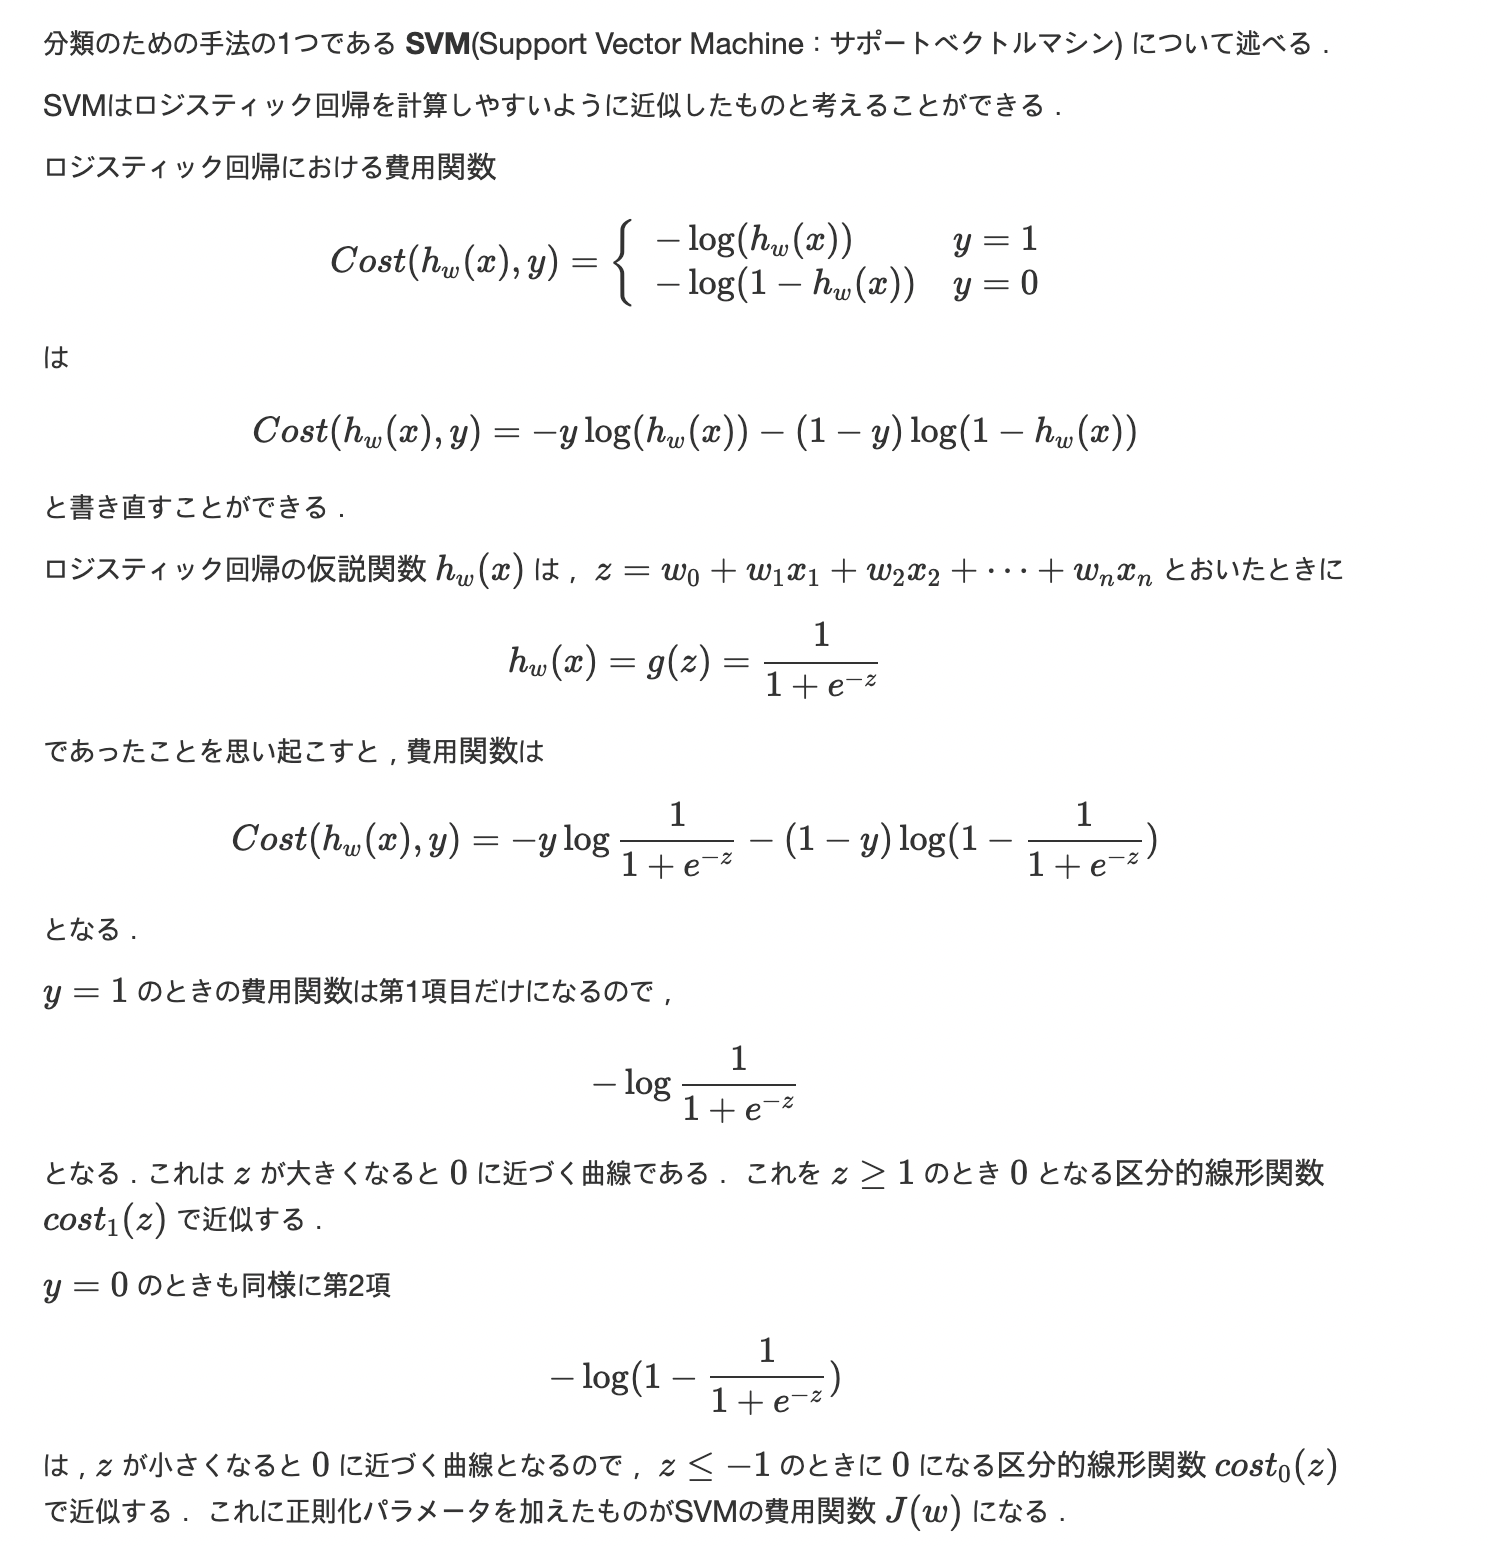

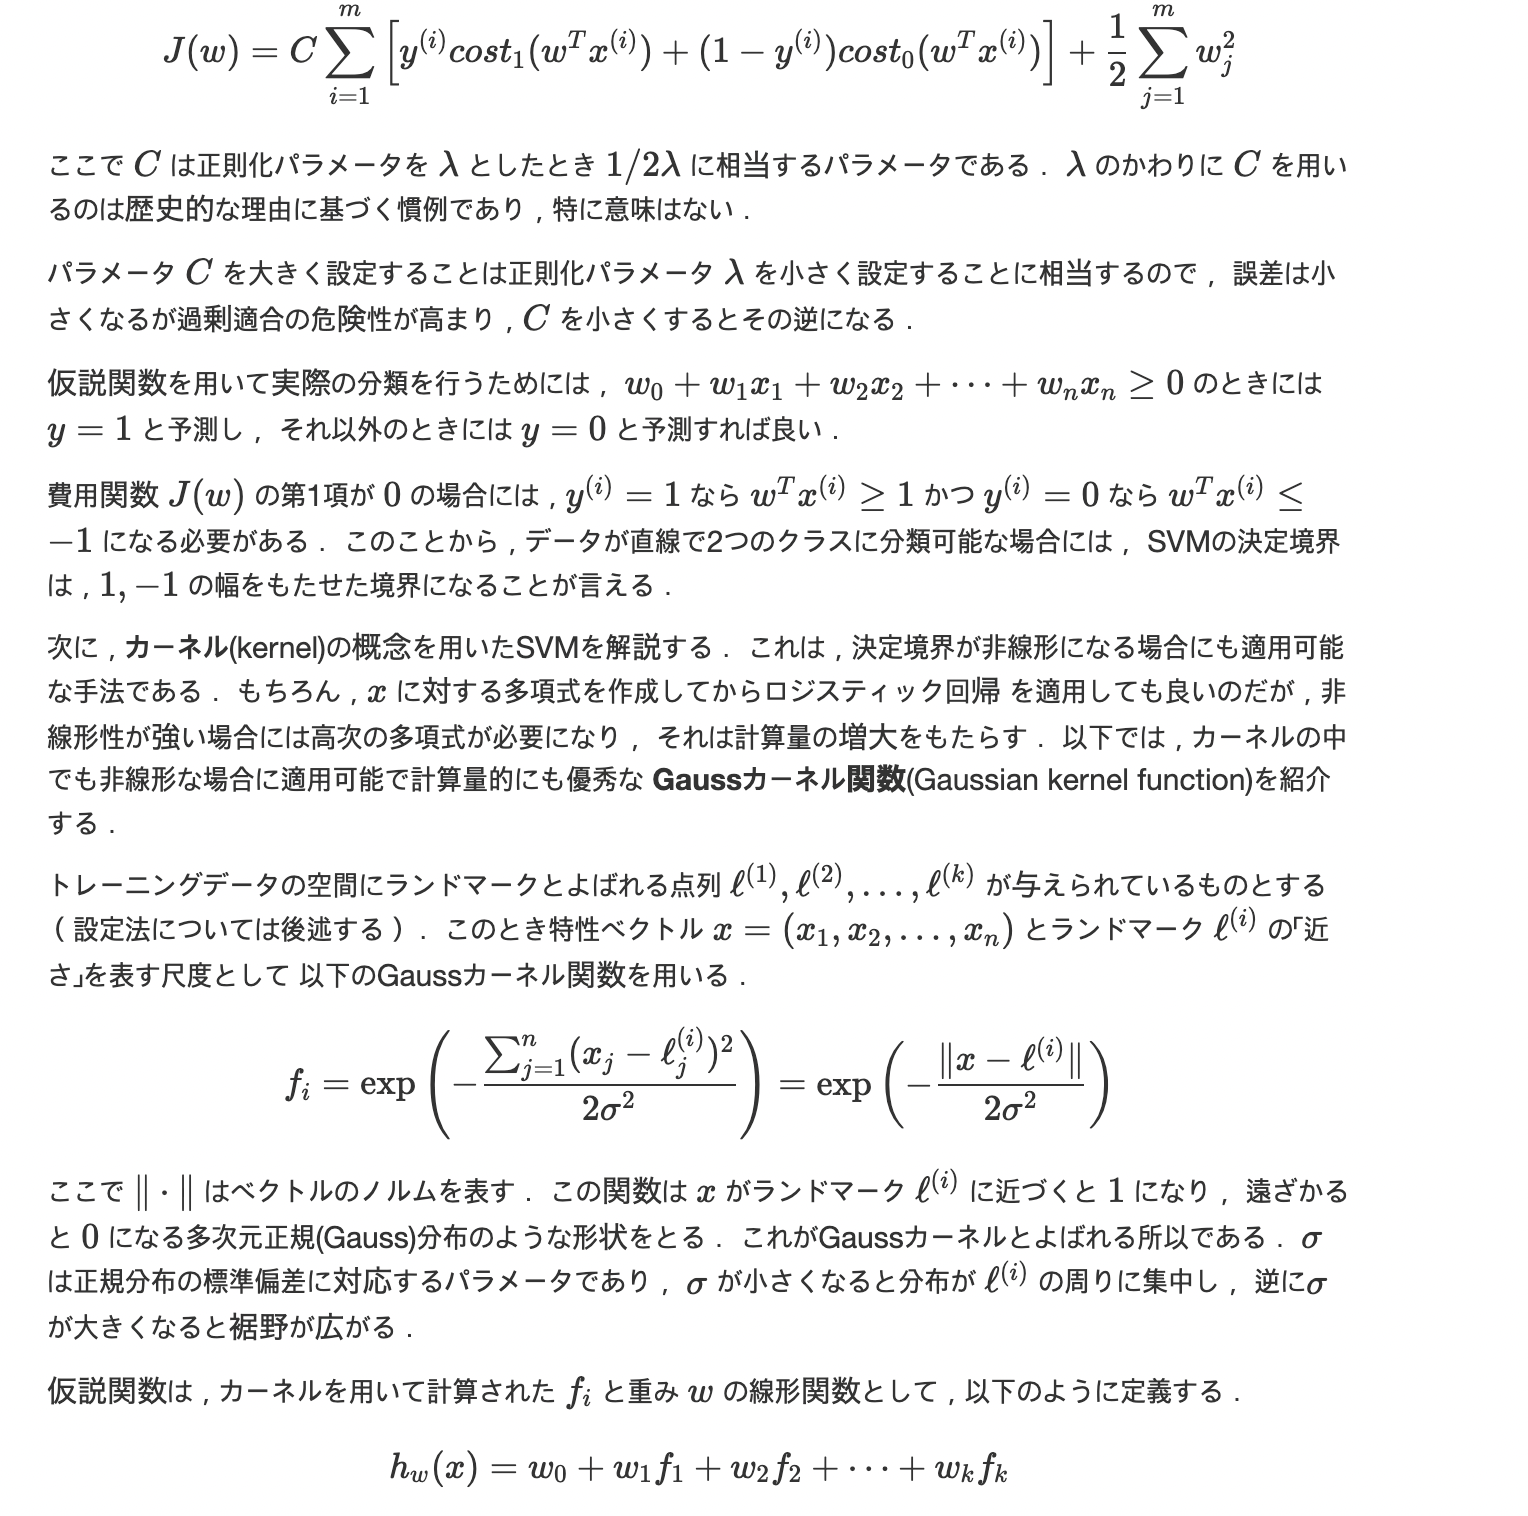

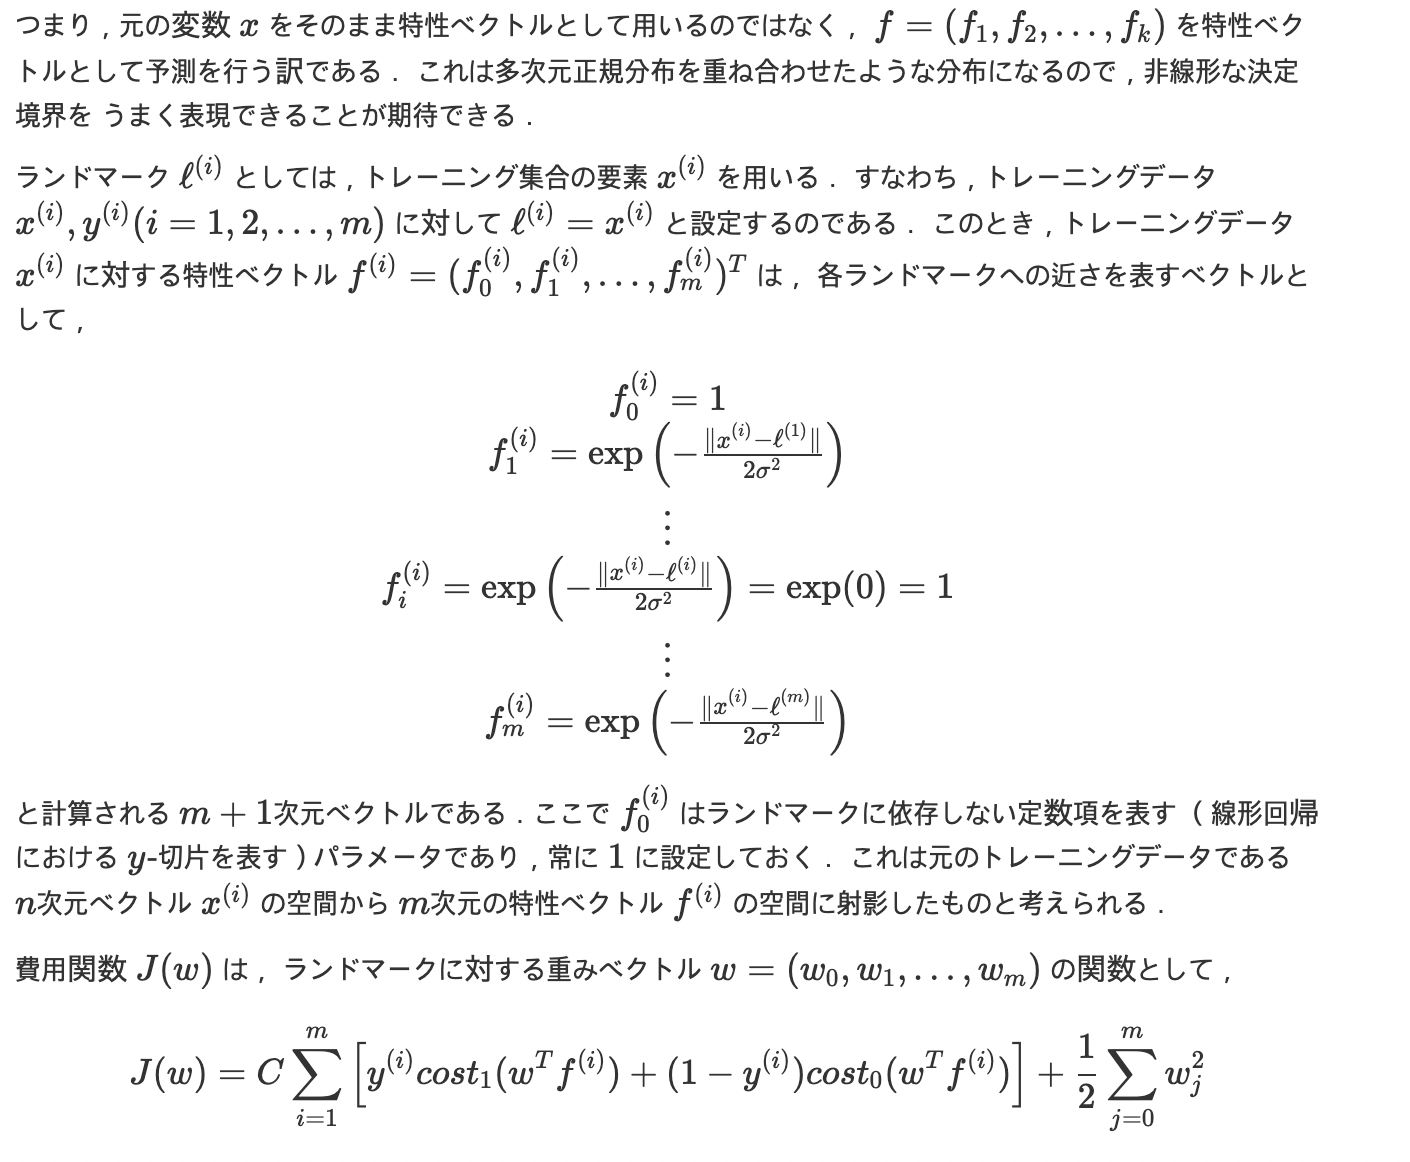

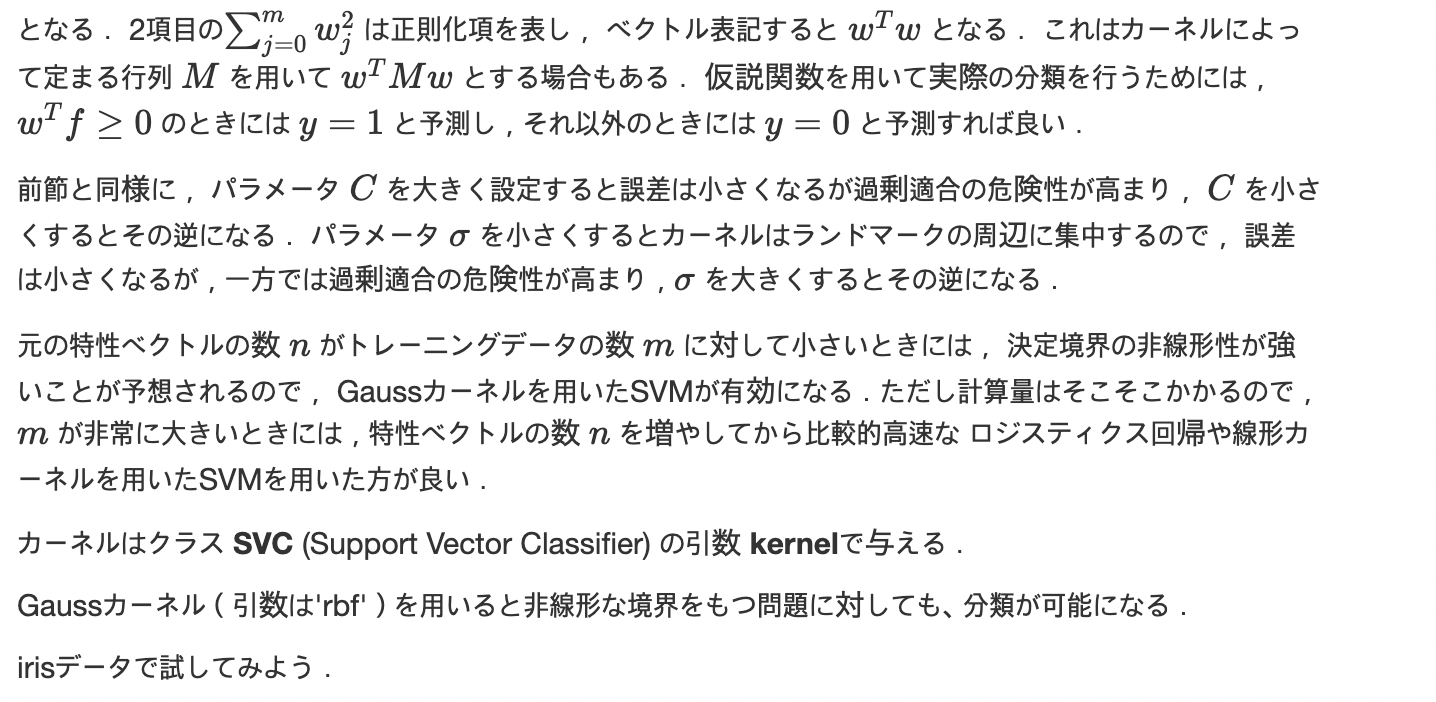

In [ ]:
# SVM = logistic regressionの近似ver

import plotly.express as px
iris = px.data.iris()

#  独立変数（特徴ベクトル） X 
X = iris[ ['sepal_length','sepal_width','petal_length','petal_width'] ]
#従属変数 y 
y = iris['species_id']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.svm import SVC      #クラスのインポート

svc = SVC(kernel='rbf', gamma="scale")        # インスタンス生成
svc.fit(X_train, y_train)    # 訓練
yhat = svc.predict(X_test)   # 予測

from sklearn import metrics
print(metrics.accuracy_score(y_test, yhat)) 

0.9777777777777777


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



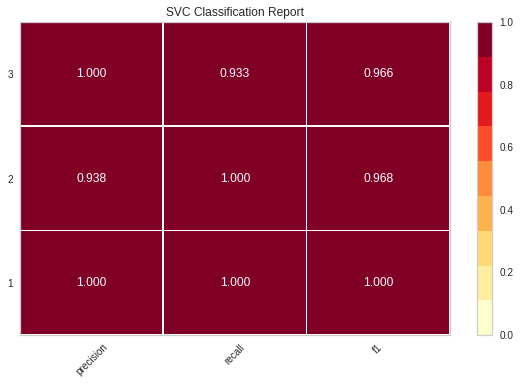

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(svc)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



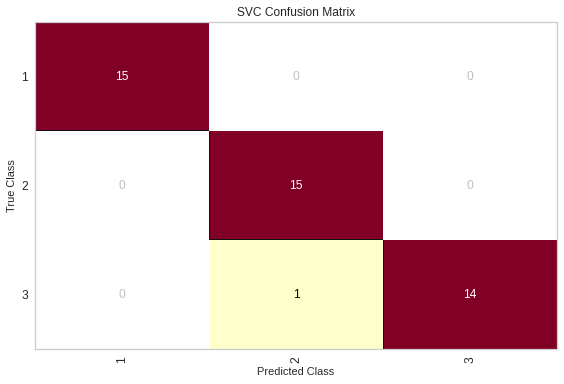

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(svc)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



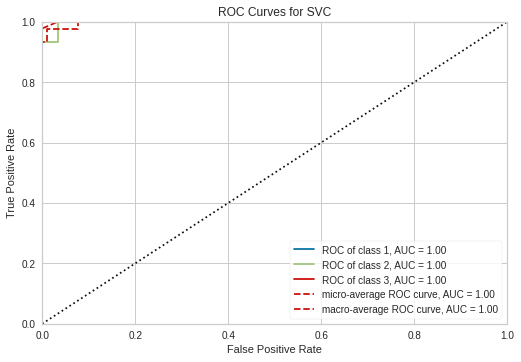

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(svc, size=(600,400))

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

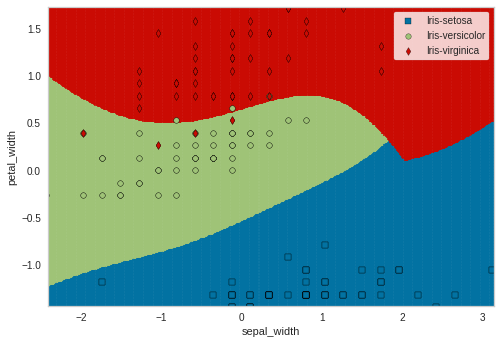

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.contrib.classifier import DecisionViz

X = iris[ ['sepal_width','petal_width'] ] # 2次元を切り出す
X = StandardScaler().fit_transform(X) #可視化のためにスケーリングしておく

viz = DecisionViz(
    svc,
    features = ['sepal_width','petal_width'],
    classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
)
viz.fit(X, y)
viz.draw(X, y)
viz.show();

#仮説の評価

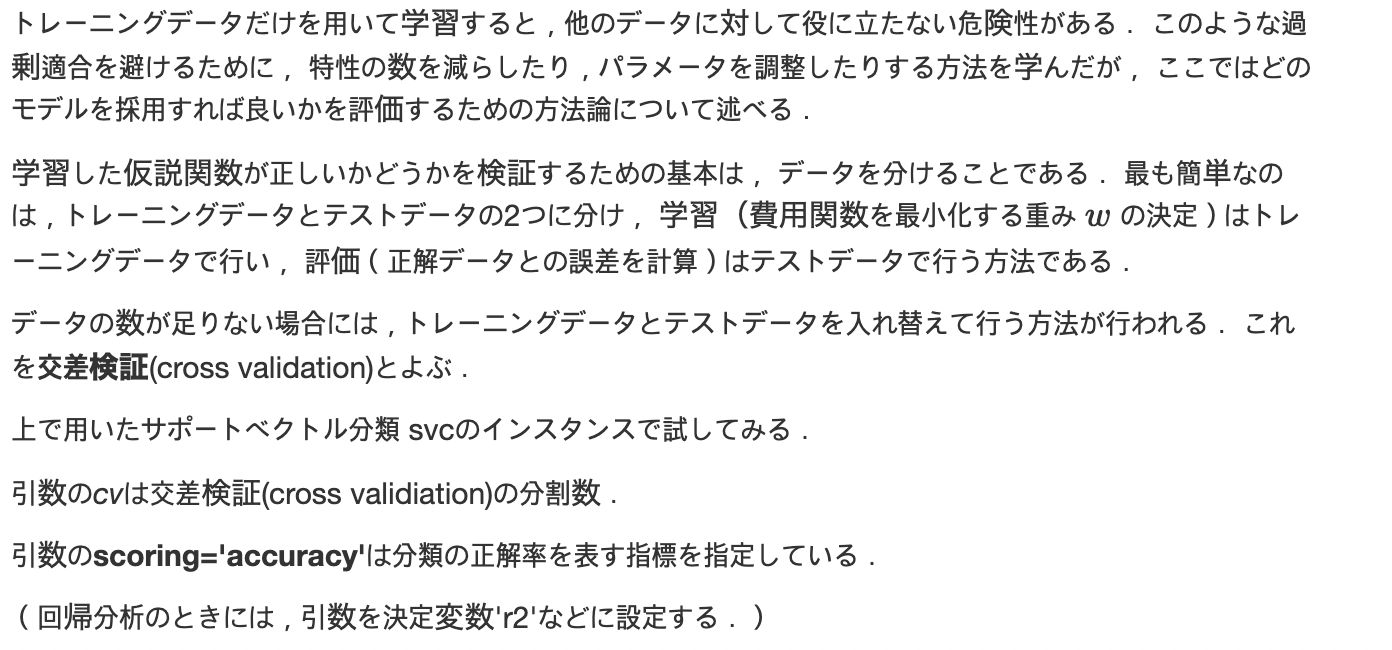

In [ ]:
# １つのテストデータだけでばらつきが大きすぎて信用できない
# この場合は交差検証(cross validation)を行えばいい - cross_val_scoreを用いる 

from sklearn.model_selection import cross_val_score 
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #(svc(インスタンス), X(元データ), y(元データ), cv(cross validationの数)=10, scoring='accuracy')

print(scores)
print(scores.mean()) 

[1.         1.         1.         0.93333333 0.93333333 0.86666667
 0.8        1.         0.93333333 1.        ]
0.9466666666666667
